# Demo of Chaos Game Class
By Katie Wuestney

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
def LCG(seed=1):
    x = seed
    #a = 950706376
    #b = 0
    #m = 2**31 - 1
    def get_seed():
        return seed
    def gen():
        nonlocal x
        """
        #ANSI C rand() 1990
        a = 1103515245
        b = 12345
        m = 2**31
        """
        '''
        #Boeing Computer Services LIB
        a = 3051757812
        b =  726106708
        m = 2**35
        '''
        #one of the worst
        a = 950706376
        b = 0
        m = 2**31 - 1
        x = (a*x + b) % m
        return x
    def integers(low, high=None, points=1):
        
        if high is None:
            high = low
            low = 0
        i = 0
        while i < points:
            yield low + (gen() % high)
            i += 1
    gen.get_seed = get_seed
    gen.ints = integers
    return gen
rng = LCG(seed=2653589793)
rng()

166033532

In [3]:
166033532
rng()

1296905928

In [4]:
def RANDU(seed=1):
    x = seed
    def get_seed():
        return seed
    def gen():
        nonlocal x
        a = 65539
        m = 2**31
        x = (a*x) % m
        return x
    def integers(low, high=None, points=1):
        
        if high is None:
            high = low
            low = 0
        i = 0
        while i < points:
            yield low + (gen() % high)
            i += 1
    gen.get_seed = get_seed
    gen.ints = integers
    return gen
rng = RANDU(seed=2653589793)
rng()

1805693795

In [5]:
def PASCAL(seed=1):
    x = seed
    def get_seed():
        return seed
    def gen():
        nonlocal x
        #one of the worst
        a = 129
        b = 907633385
        m = 2**32
        x = ((a*x + b) % m)
        return x
    def integers(low, high=None, points=1):
        
        if high is None:
            high = low
            low = 0
        i = 0
        while i < points:
            yield low + (gen() % high)
            i += 1
    gen.get_seed = get_seed
    gen.ints = integers
    return gen
rng = PASCAL(seed=2653589793)
rng()

3918300298

In [6]:
np.array(rng.ints(0, 4, 20))

array(<generator object PASCAL.<locals>.integers at 0x000002AED9A83820>,
      dtype=object)

In [7]:
205800 % 6

0

In [8]:
def ngon_coords(verts):
    radians=[]
    for k in range(verts):
        rad = (2*np.pi*k)/verts
        radians.append(rad)
    x_vals = np.cos(radians)
    y_vals =np.sin(radians)
    return x_vals, y_vals

In [9]:
class chaos_game:
    def __init__(self, verts, points, RNG='default_rng'):
        #self.fig = fig
        #self.ax = ax
        self.verts = verts
        self.points = points
        #get vertex coordinates
        x_vals, y_vals = ngon_coords(verts)
        self.x_vals = x_vals
        self.y_vals = y_vals
        vert_coords = np.column_stack((x_vals, y_vals))
        xmin = x_vals.min() - 0.2
        xmax = x_vals.max() + 0.2
        ymin = y_vals.min() - 0.2
        ymax = y_vals.max() + 0.2
        self.xlims = (xmin, xmax)
        self.ylims = (ymin, ymax)
        #c is starting coordinate
        c = np.array([0.0, 0.25])

        #initiate figure instance
        self.fig, self.ax = plt.subplots(figsize=(4, 4))
        self.ax.set(xlim=self.xlims, ylim=self.ylims)
        if RNG == 'default_rng':
            rng = np.random.default_rng()
            self.randints = rng.integers(0, verts, points)
        elif RNG == 'LCG':
            rng = LCG()
            self.randints = list(rng.ints(0, verts, points))
        elif RNG == 'Mersenne':
            rng = np.random.Generator(np.random.MT19937())
            self.randints = rng.integers(0, verts, points)
        elif RNG == 'RANDU':
            rng = RANDU(33)
            self.randints = list(rng.ints(0, verts, points))
        elif RNG == 'PASCAL':
            rng = PASCAL(33)
            self.randints = list(rng.ints(0, verts, points))
        coords = [c]
        #firstpts = 10
        for i in self.randints:
            coords.append((coords[-1] + vert_coords[i])/2)
        self.coords = coords[1:]
        
    def plot(self):
        x, y = zip(*self.coords)
        self.ax.scatter(self.x_vals, self.y_vals, c='b', label='vertices')
        self.ax.legend()
        for i, xy in enumerate(zip(self.x_vals, self.y_vals)):
            self.ax.annotate(f'{i}', xy, xycoords='data', xytext=(4,4), textcoords='offset points')
        self.ax.scatter(x, y, s=1, c='g')
        return
        
    def savefig(self, filename, **kwargs):
        self.fig.savefig(filename, **kwargs)
        return

    def init_frame(self):
        self.ax.cla()
        self.ax.set(xlim=self.xlims, ylim=self.ylims)
        self.ax.scatter(x=0, y=0.25, s=1, c='r', label='inital point')
        self.ax.scatter(self.x_vals, self.y_vals, c='b', label='vertices')
        self.ax.legend()
        for i, xy in enumerate(zip(self.x_vals, self.y_vals)):
            self.ax.annotate(f'{i}', xy, xycoords='data', xytext=(4,4), textcoords='offset points')
        return
    
    def animation(self, i):
        i_from = i * self.chunks
        # are we on the last frame?
        if i_from + self.chunks > len(self.coords) - 1:
            i_to = len(self.coords) - 1
        else:
            i_to = i_from + self.chunks
        rows = self.coords[i_from:i_to]
        x, y = zip(*rows)
        self.ax.scatter(x, y, s=1, c='g')
        return
    
    def animate(self, chunks=10):
        self.chunks = chunks
        self.frame_chunks = self.points // self.chunks
        self.ani = FuncAnimation(self.fig, self.animation, frames=self.frame_chunks, init_func=self.init_frame, interval=0.5, repeat=True, blit=True)
        plt.show()
        
    def movie(self):
        movie1 = self.ani.to_jshtml()
        return movie1
    
    def pause(self):
        self.ani.pause()
        return

<IPython.core.display.Javascript object>


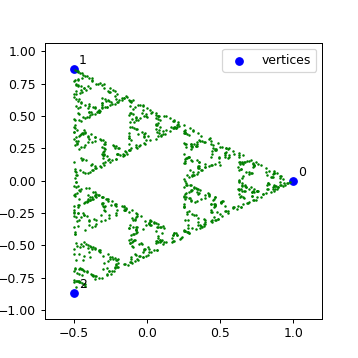

In [10]:
sierp = chaos_game(3, 1000)
sierp.plot()

<IPython.core.display.Javascript object>


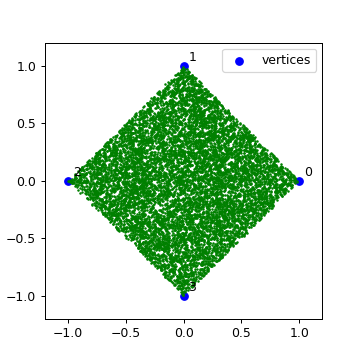

In [10]:
cgLCG = chaos_game(4, 10000, RNG='LCG')
cgLCG.plot()

In [ ]:
cgRANDU = chaos_game(4, 10000, RNG='RANDU')
cgRANDU.plot()

In [ ]:
cgPASCAL = chaos_game(8, 10000, RNG='PASCAL')
cgPASCAL.plot()

In [ ]:
cgMT = chaos_game(5, 10000, RNG='Mersenne')
cgMT.plot()

In [ ]:
cg4 = chaos_game(4, 20000)

#cg4.savefig('demo_files/chaosgame4v.png')

In [ ]:
cg4.animate(chunks=)

In [ ]:
cg4 = chaos_game(8, 20000)
cg4.plot()
cg4.savefig('demo_files/chaosgame8v.png')

In [ ]:
cg4 = chaos_game(16, 20000)
cg4.plot()
cg4.savefig('demo_files/chaosgame16v.png')

In [ ]:
cg = chaos_game(5, 10000)
cg.plot()

In [ ]:
mv = cg.animate()
HTML(mv)